Practical Questions


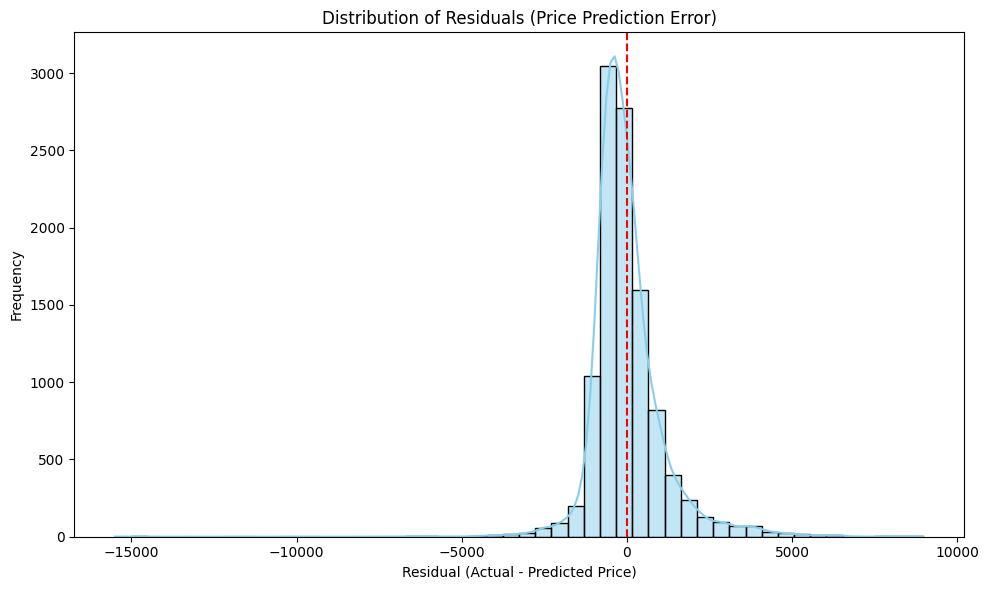

In [ ]:
# 1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Drop rows with missing values (if any)
diamonds.dropna(inplace=True)

# Define features and target
X = diamonds.drop(columns=["price"])
y = diamonds["price"]

# Identify categorical and numerical features
categorical_cols = ["cut", "color", "clarity"]
numerical_cols = ["carat", "depth", "table", "x", "y", "z"]

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)

# Combine preprocessing and model into a pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict and calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot the residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50, color="skyblue")
plt.title("Distribution of Residuals (Price Prediction Error)")
plt.xlabel("Residual (Actual - Predicted Price)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
# 2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Sample dataset (replace with your own)
# Features (X) and target (y)
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Squared Error (MSE): 0.7347
Mean Absolute Error (MAE): 0.8571
Root Mean Squared Error (RMSE): 0.8571


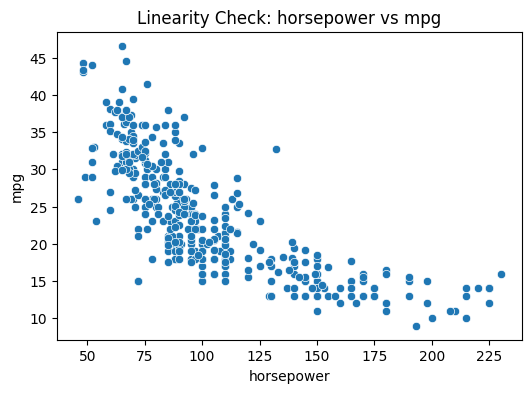

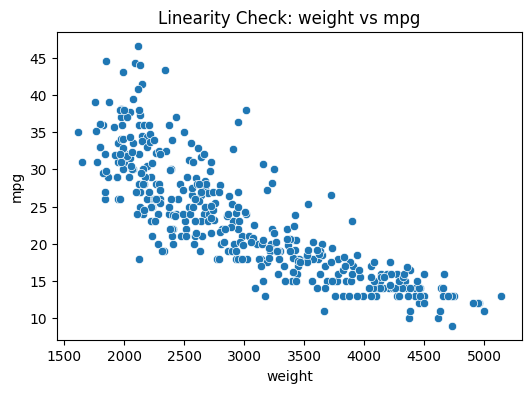

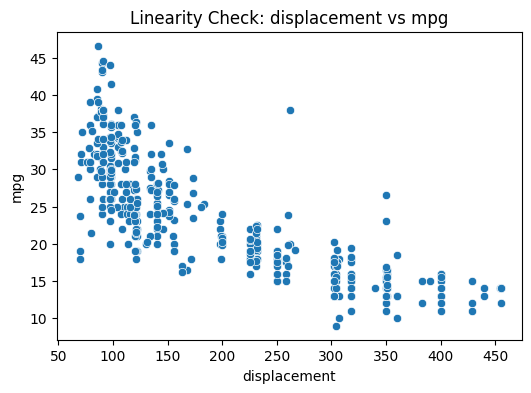

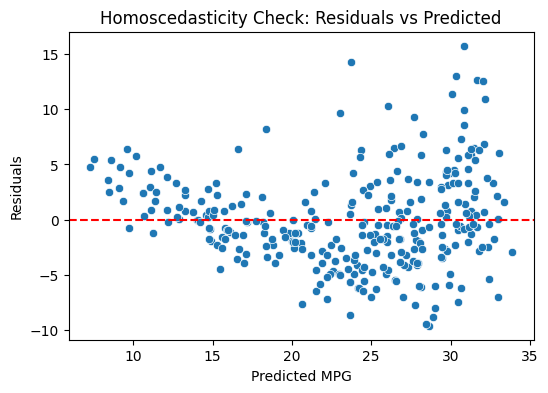

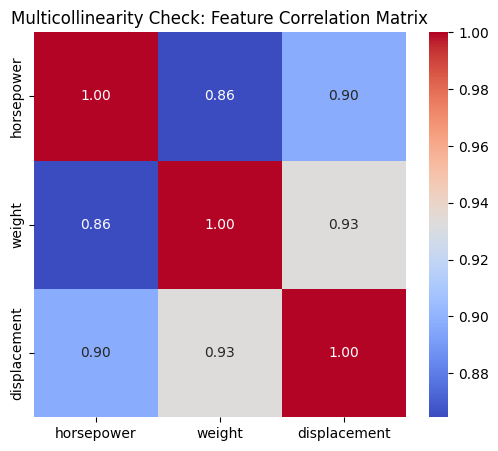

In [ ]:
# 3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load example dataset (you can replace this with your own)
df = sns.load_dataset('mpg').dropna()  # Using the 'mpg' dataset for demo

# Define independent and dependent variables
X = df[['horsepower', 'weight', 'displacement']]
y = df['mpg']

# Linear Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
residuals = y_train - y_pred

# Linearity: Scatter plot of each feature vs target ---
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[col], y=y)
    plt.title(f'Linearity Check: {col} vs mpg')
    plt.xlabel(col)
    plt.ylabel('mpg')
    plt.show()

# Homoscedasticity: Residuals vs Predicted values ---
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Homoscedasticity Check: Residuals vs Predicted')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.show()

# Multicollinearity: Correlation matrix ---
plt.figure(figsize=(6, 5))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Multicollinearity Check: Feature Correlation Matrix')
plt.show()


In [ ]:
# 4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models.

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load sample regression dataset
data = fetch_california_housing()
X, y = data.data, data.target

# List of regression models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=1.0, epsilon=0.2)
}

# Evaluate each model using a pipeline with scaling and cross-validation
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')  # R² score
    print(f"{name}:")
    print(f"  R² Score: Mean = {scores.mean():.4f}, Std = {scores.std():.4f}\n")



Linear Regression:
  R² Score: Mean = 0.5530, Std = 0.0617

Ridge Regression:
  R² Score: Mean = 0.5530, Std = 0.0617

Lasso Regression:
  R² Score: Mean = 0.4311, Std = 0.0739

Random Forest:
  R² Score: Mean = 0.6559, Std = 0.0785

Support Vector Regressor:
  R² Score: Mean = 0.6686, Std = 0.0541



In [6]:
# 5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print results
print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])
print("R-squared score:", r2)


Coefficient: 2.99025910100489
Intercept: 4.206340188711437
R-squared score: 0.6521157503858556


First 5 rows of dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           6.69e-34
Time:                        05:27:51   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.

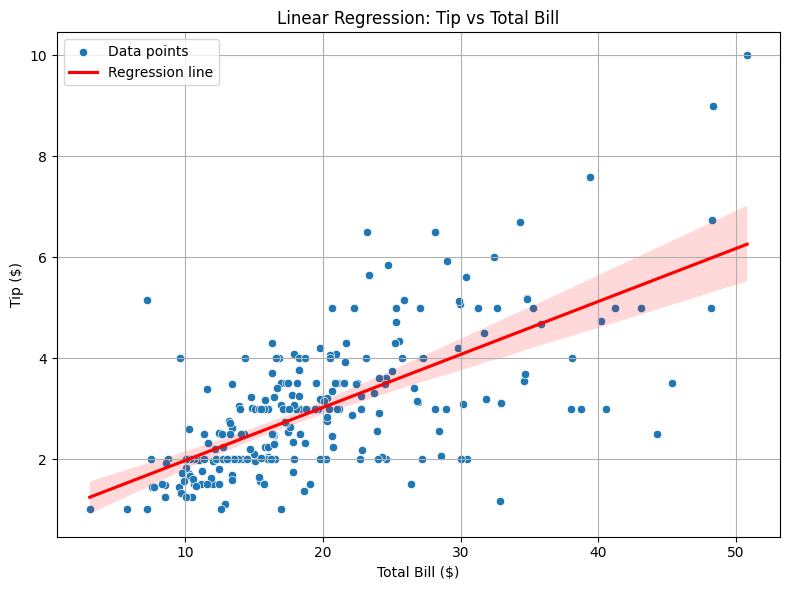

In [7]:
# 6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Display the first few rows
print("First 5 rows of dataset:")
print(tips.head())

# Define the independent and dependent variables
X = tips['total_bill']
y = tips['tip']

# Add constant to the independent variable (required by statsmodels)
X = sm.add_constant(X)

# Fit the OLS model (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print("\nRegression Summary:")
print(model.summary())

# Visualize the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, label='Data points')
sns.regplot(x='total_bill', y='tip', data=tips, scatter=False, label='Regression line', color='red')
plt.title('Linear Regression: Tip vs Total Bill')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


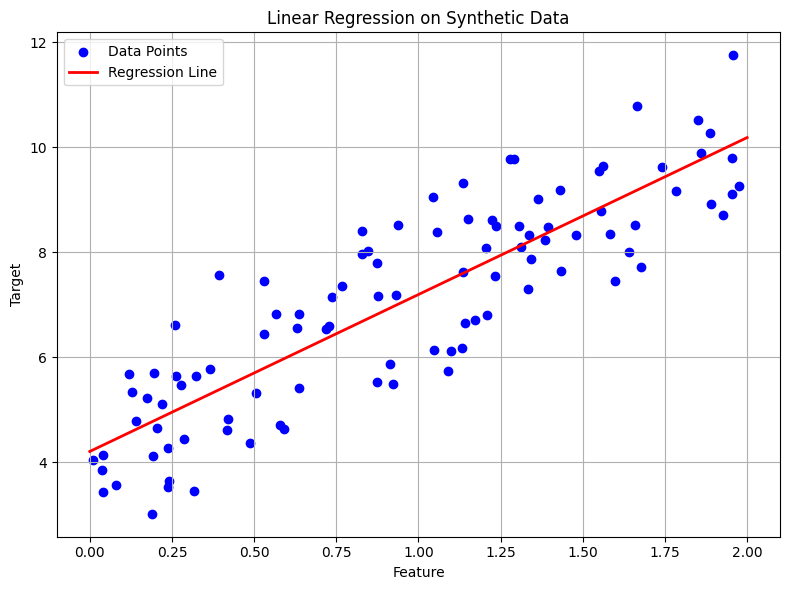

In [8]:
# 7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Target with some noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values using the model
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = model.predict(X_new)

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_new, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# 8. Write a Python script that pickles a trained linear regression model and saves it to a file.

import pickle
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate a sample regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split into training and test sets (not necessary for pickling, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Pickle the model
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model has been pickled and saved to 'linear_model.pkl'.")


Model has been pickled and saved to 'linear_model.pkl'.


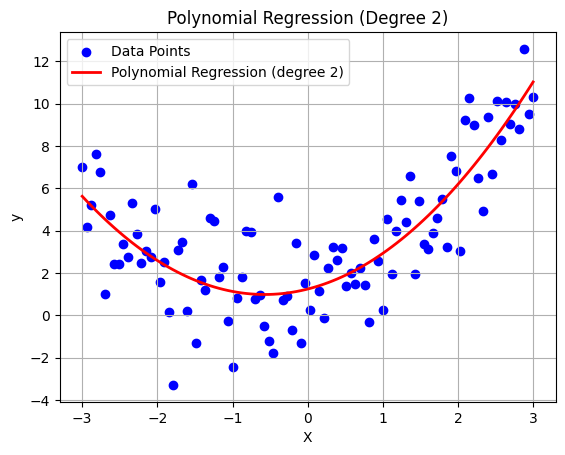

In [10]:
# 9.  Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some sample data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(*X.shape) * 2  # Quadratic with noise

# Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the model
y_pred = model.predict(X_poly)

# Plot original data and regression curve
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Polynomial Regression (degree 2)')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


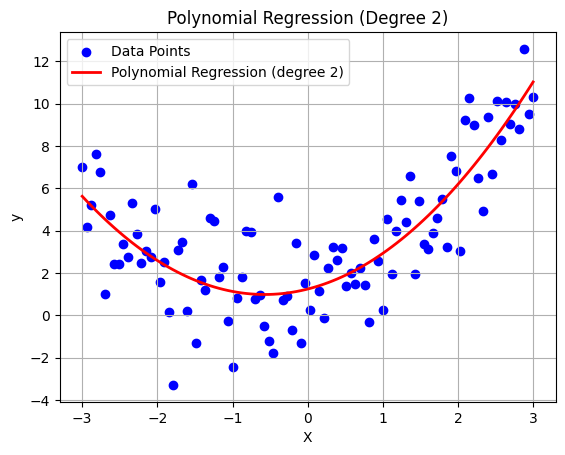

In [11]:
# 10. import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some sample data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(*X.shape) * 2  # Quadratic with noise

# Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the model
y_pred = model.predict(X_poly)

# Plot original data and regression curve
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Polynomial Regression (degree 2)')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


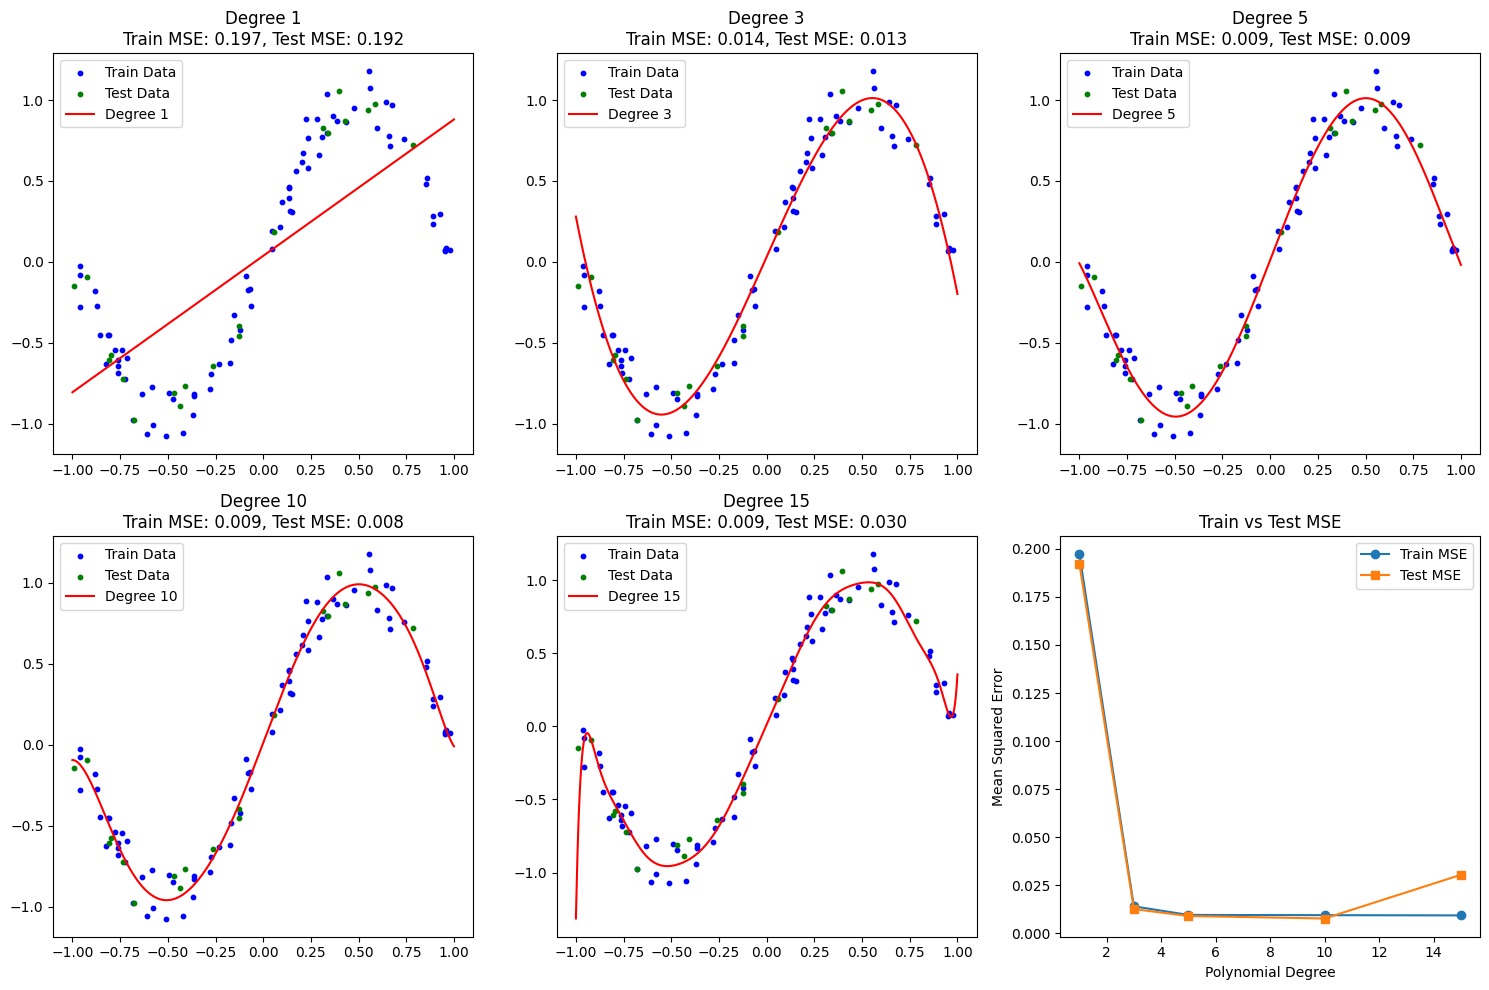

In [12]:
# 11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.sort(2 * np.random.rand(100, 1) - 1, axis=0)  # Random values in [-1, 1]
y = np.sin(np.pi * X).ravel() + 0.1 * np.random.randn(100)  # True function + noise

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and evaluate polynomial models of various degrees
degrees = [1, 3, 5, 10, 15]
train_errors = []
test_errors = []

plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Fit model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    # Calculate errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Plot predictions
    X_plot = np.linspace(-1, 1, 500).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.subplot(2, 3, i+1)
    plt.scatter(X_train, y_train, color='blue', s=10, label='Train Data')
    plt.scatter(X_test, y_test, color='green', s=10, label='Test Data')
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f'Degree {degree}\nTrain MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}')
    plt.legend()

# Compare MSE
plt.subplot(2, 3, 6)
plt.plot(degrees, train_errors, label='Train MSE', marker='o')
plt.plot(degrees, test_errors, label='Test MSE', marker='s')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test MSE')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
# 12.  Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Sample dataset (10 samples, 2 features)
# X = [[feature1, feature2], ...]
X = np.array([
    [1, 2],
    [2, 1],
    [3, 4],
    [4, 3],
    [5, 6],
    [6, 5],
    [7, 8],
    [8, 7],
    [9, 10],
    [10, 9]
])

# Target values (Y)
y = np.array([3, 3, 7, 7, 11, 11, 15, 15, 19, 19])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print model details
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared score:", r2_score(y_test, y_pred))


Coefficients: [1. 1.]
Intercept: -3.552713678800501e-15
R-squared score: 1.0


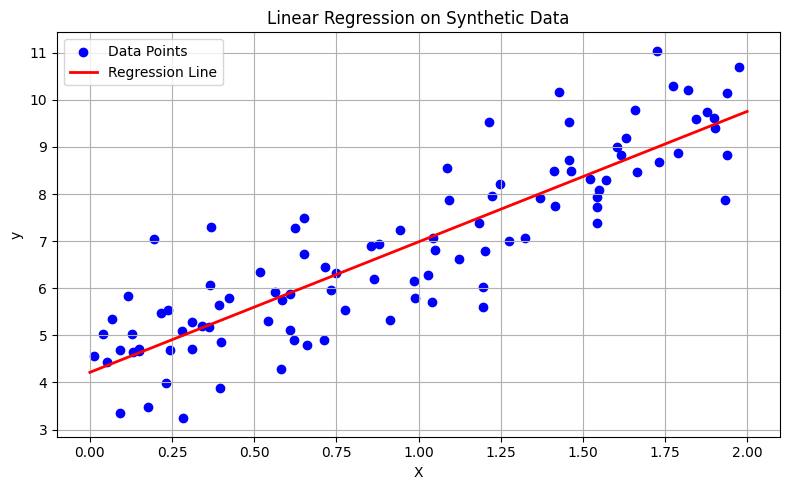

In [14]:
# 13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 points between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the model
X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

# Plot the data and the regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_new, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# 14.  Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import fetch_california_housing
import warnings

# Suppress warnings from statsmodels
warnings.filterwarnings("ignore")

def calculate_vif(df):
    """Calculate Variance Inflation Factor (VIF) for each feature."""
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

def main():
    # Load California housing dataset
    housing = fetch_california_housing(as_frame=True)
    X = housing.data  # Only features (no target)

    # Calculate and display VIF
    vif_result = calculate_vif(X)
    print("\nVariance Inflation Factors (VIF):")
    print(vif_result.sort_values(by="VIF", ascending=False))

if __name__ == "__main__":
    main()



Variance Inflation Factors (VIF):
      feature         VIF
7   Longitude  633.711654
6    Latitude  559.874071
2    AveRooms   45.993601
3   AveBedrms   43.590314
0      MedInc   11.511140
1    HouseAge    7.195917
4  Population    2.935745
5    AveOccup    1.095243


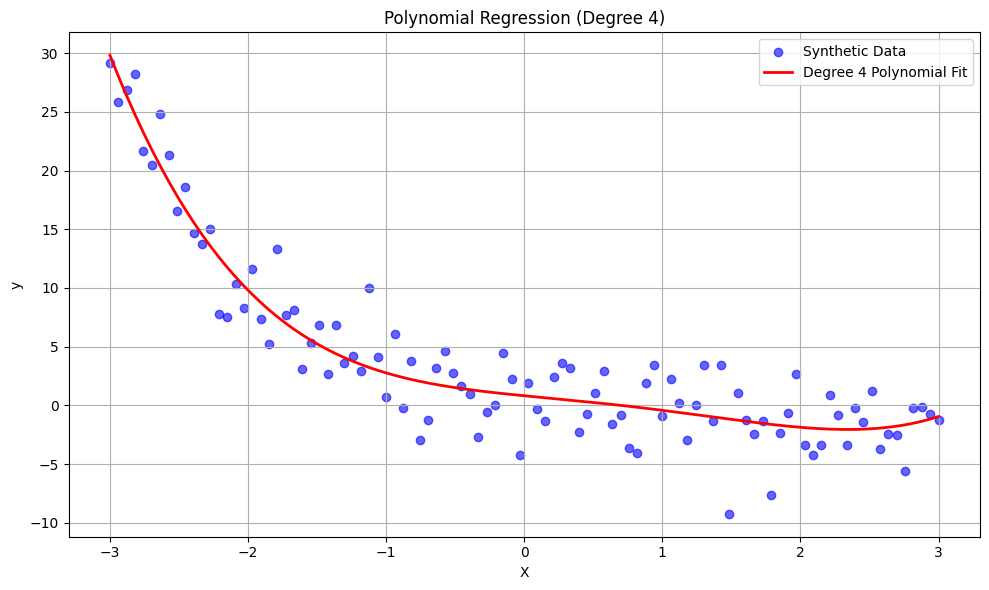

In [17]:
# 15.  Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100)
# True underlying polynomial: y = 1 - 2x + 0.5x^2 - 0.3x^3 + 0.1x^4 + noise
y = 1 - 2*X + 0.5*X**2 - 0.3*X**3 + 0.1*X**4 + np.random.normal(scale=3, size=X.shape)

# Reshape X to be 2D
X = X.reshape(-1, 1)

# Fit a 4th-degree polynomial regression model
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Predict and plot
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
y_pred = model.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Synthetic Data', alpha=0.6)
plt.plot(X_plot, y_pred, color='red', linewidth=2, label=f'Degree {degree} Polynomial Fit')
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# 16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standardization and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")


R-squared score: 0.9944


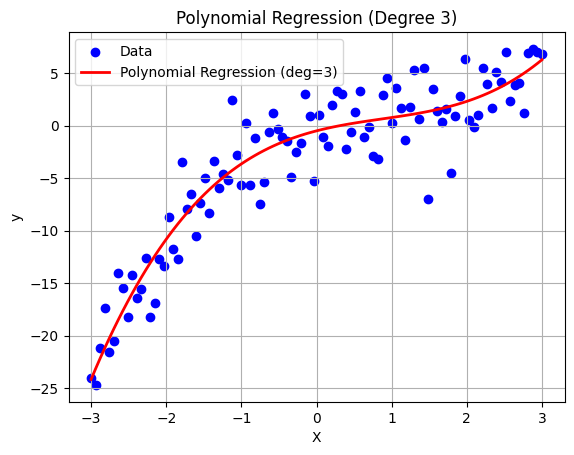

In [19]:
# 17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + X + np.random.normal(scale=3, size=X.shape)

# Transform features to polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_pred = model.predict(X_poly)

# Plot original data and polynomial regression curve
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Polynomial Regression (deg=3)')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# 18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate a synthetic dataset with 100 samples and 5 features
X, y, coef_true = make_regression(n_samples=100, n_features=5,
                                   noise=10.0, coef=True, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate R-squared score
r2 = r2_score(y, y_pred)

# Output results
print("R-squared score:", r2)
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("True coefficients (from dataset generation):", coef_true)


R-squared score: 0.9955395169111729
Model coefficients: [61.83002653 98.93196386 61.31053663 54.99112667 35.59006051]
Intercept: -0.08525293377130971
True coefficients (from dataset generation): [60.57748194 98.65152488 64.59172413 57.07783047 35.60967259]


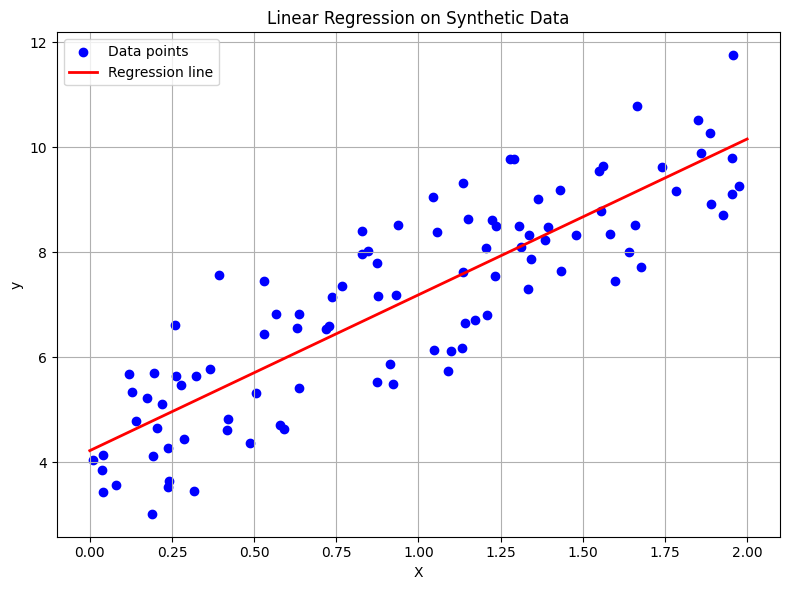

In [21]:
# 19.  Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)  # For reproducibility
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicted values
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = model.predict(X_new)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# 20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
X = np.random.rand(n_samples, 3)  # 3 features
true_coeffs = [3.5, -2.0, 4.7]
noise = np.random.randn(n_samples) * 0.5
y = X @ true_coeffs + noise  # Linear combination + noise

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Output results
print("R² Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R² Score: 0.8530489618630306
Coefficients: [ 3.55294884 -2.037697    5.04302962]
Intercept: -0.04250522081646135


In [23]:
# 21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

# joblib_serialization_example.py

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy before saving: {accuracy_score(y_test, y_pred):.2f}")

# Serialize the model using joblib
joblib.dump(model, 'random_forest_model.joblib')
print("Model saved to 'random_forest_model.joblib'.")

# Deserialize the model
loaded_model = joblib.load('random_forest_model.joblib')

# Evaluate the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print(f"Accuracy after loading: {accuracy_score(y_test, y_pred_loaded):.2f}")


Accuracy before saving: 1.00
Model saved to 'random_forest_model.joblib'.
Accuracy after loading: 1.00


Mean Squared Error: 0.703
R² Score: 0.437


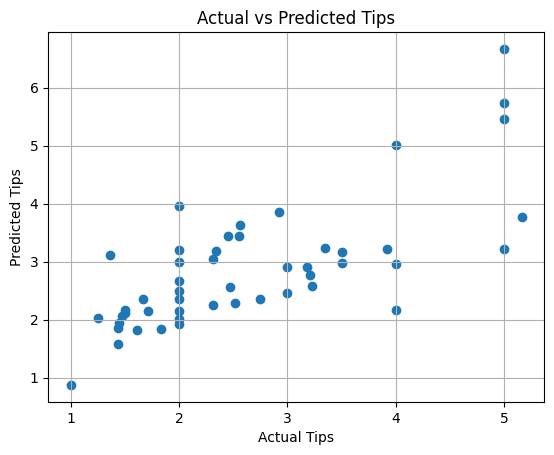

In [24]:
# 22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Features and target
X = tips.drop('tip', axis=1)
y = tips['tip']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create the preprocessor for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # Pass through numerical columns without transformation
)

# Create the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# Plot predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Actual vs Predicted Tips")
plt.grid(True)
plt.show()


In [25]:
# 23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#  Regression
ridge = Ridge(alpha=1.0)  # you can adjust alpha
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Print results
print("Linear Regression Coefficients:", lr.coef_)
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print()
print("Ridge Regression Coefficients:", ridge.coef_)
print("Ridge Regression R² Score:", r2_score(y_test, y_pred_ridge))


Linear Regression Coefficients: [61.52208912 98.47253675 61.09969936 55.54150072 35.97411246]
Linear Regression R² Score: 0.9944099738323338

Ridge Regression Coefficients: [60.80641691 96.97650095 59.85083263 54.82588222 35.69887237]
Ridge Regression R² Score: 0.994006040552328


In [26]:
# 24.  Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get negative MSE scores
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)

# Convert negative MSE to positive
mse_scores = -mse_scores

# Print results
print("Mean Squared Error for each fold:")
for i, mse in enumerate(mse_scores, start=1):
    print(f"Fold {i}: {mse:.2f}")

print(f"\nAverage MSE: {np.mean(mse_scores):.2f}")
print(f"Standard Deviation of MSE: {np.std(mse_scores):.2f}")


Mean Squared Error for each fold:
Fold 1: 95.12
Fold 2: 96.57
Fold 3: 94.82
Fold 4: 93.28
Fold 5: 102.51

Average MSE: 96.46
Standard Deviation of MSE: 3.20


In [27]:
# 25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + 0.2 * np.random.randn(100)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Polynomial Regression Model R² Scores:\n")
for degree in range(1, 6):
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_poly)
    score = r2_score(y_test, y_pred)

    print(f"Degree {degree}: R² Score = {score:.4f}")


Polynomial Regression Model R² Scores:

Degree 1: R² Score = 0.5045
Degree 2: R² Score = 0.8127
Degree 3: R² Score = 0.9367
Degree 4: R² Score = 0.9385
Degree 5: R² Score = 0.9460
